In [1]:
import numpy as np
import pydicom

In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
import os
import glob


In [5]:
#cargo la carpeta donde guardé las imágenes DICOM. Son imágenes de resonancia magnética (RMI)
INPUT_FOLDER = 'C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19'
patients =  os.listdir(INPUT_FOLDER)
patients.sort()

In [6]:
lstFilesDCM = []   # creo una lista vacía y voy agreagando los archivos DICOM en la lista
def load_scan2(path):
    for dirName, subdirList, fileList in os.walk(path):
        for filename in fileList:
            if ".dcm" in filename.lower():  
                lstFilesDCM.append(os.path.join(dirName, filename))
    return lstFilesDCM

first_patient = load_scan2(INPUT_FOLDER)
print(lstFilesDCM)  #para visualizar la lista

['C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19\\IMG0001.dcm', 'C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19\\IMG0002.dcm', 'C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19\\IMG0003.dcm', 'C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19\\IMG0004.dcm', 'C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19\\IMG0005.dcm', 'C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19\\IMG0006.dcm', 'C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19\\IMG0007.dcm', 'C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19\\IMG0008.dcm', 'C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19\\IMG0009.dcm', 'C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19\\IMG0010.dcm', 'C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19\\IMG0011.dcm', 'C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19\\IMG00

In [7]:
print (lstFilesDCM[0]) #visualizo el primer elemento de la lista

RefDs = pydicom.read_file(lstFilesDCM[0]) #leo el primer elemento

# Cargo las dimensiones basadas en el numnero de filas, columnas,y cortes(a lo largo del eje z)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Cargo el esácio entre los datos (en mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))


x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19\IMG0001.dcm


In [8]:
# El arreglo está dimensionado en 'ConstPixelDims'

ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# Bucle a través de todos los archivos DICOM
for filenameDCM in lstFilesDCM:
    # Leo el archivo
    ds = pydicom.read_file(filenameDCM)
    # Almaceno los datos de imágen sin procesar
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

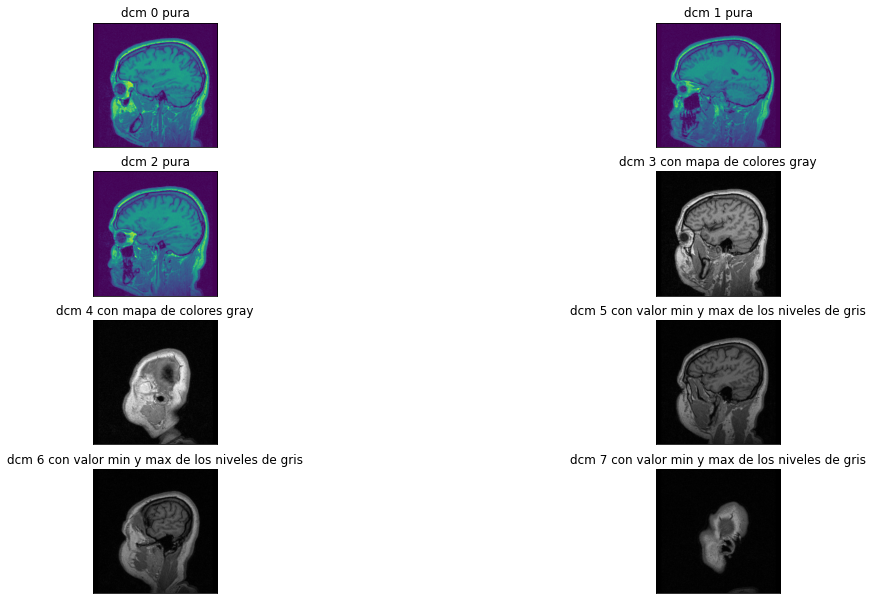

In [10]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(4,2,1),plt.imshow((ArrayDicom[:, :, 40]))#,cmap = 'gray')
plt.title('dcm 0 pura'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,2),plt.imshow((ArrayDicom[:, :, 50]))#,cmap = 'gray')
plt.title('dcm 1 pura'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,3),plt.imshow((ArrayDicom[:, :, 90]))#,cmap = 'gray')
plt.title('dcm 2 pura'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,4),plt.imshow((ArrayDicom[:, :, 100]),cmap = 'gray')
plt.title('dcm 3 con mapa de colores gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,5),plt.imshow((ArrayDicom[:, :, 120]),cmap = 'gray')
plt.title('dcm 4 con mapa de colores gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,6),plt.imshow((ArrayDicom[:, :, 30]),cmap = 'gray', vmin=0,vmax=255)
plt.title('dcm 5 con valor min y max de los niveles de gris'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,7),plt.imshow((ArrayDicom[:, :, 20]),cmap = 'gray', vmin=0,vmax=255)
plt.title('dcm 6 con valor min y max de los niveles de gris'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,8),plt.imshow((ArrayDicom[:, :, 7]),cmap = 'gray', vmin=0,vmax=255)
plt.title('dcm 7 con valor min y max de los niveles de gris'), plt.xticks([]), plt.yticks([])



plt.show()

In [11]:
#Convierto los archivos DICOM en formato JPG para poder procesarla

#Hacer esto true si quiero en formato PNG
#Convierto en PNG porque le da más calidad y no pierde tanta resolución como sí lo hace en formate JPG
PNG = True

# Especifico la rurta de la carpeta de archivos .dcm
folder_path = "C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/ScalarVolume_19"

# Especifico la ruta de la carpeta donde se cargan archivos JPG/PNG 
jpg_folder_path = "C:/Users/User/Desktop/MRHEAD from slicer 3d desktop/PNG"

images_path = os.listdir(folder_path)
for n, image in enumerate(images_path):
    ds = pydicom.dcmread(os.path.join(folder_path, image))
    pixel_array_numpy = ds.pixel_array
    if PNG == False:
        image = image.replace('.dcm', '.jpg')
    else:
        image = image.replace('.dcm', '.png')
    cv2.imwrite(os.path.join(jpg_folder_path, image), pixel_array_numpy)
    if n % 50 == 0:
        print('{} image converted'.format(n))
        

0 image converted
50 image converted
100 image converted


In [97]:
from PIL import Image 
I=Image.open('C://Users//User//Desktop//MRHEAD from slicer 3d desktop//PNG//IMG0067.png')
#Igris=I.convert('L')

In [98]:
Igris=I.convert('L')

In [100]:
f = np.asarray(Igris)

In [101]:
hist = cv2.calcHist([f],[0],None,[256],[0,256])

Text(0.5, 1.0, 'Histograma')

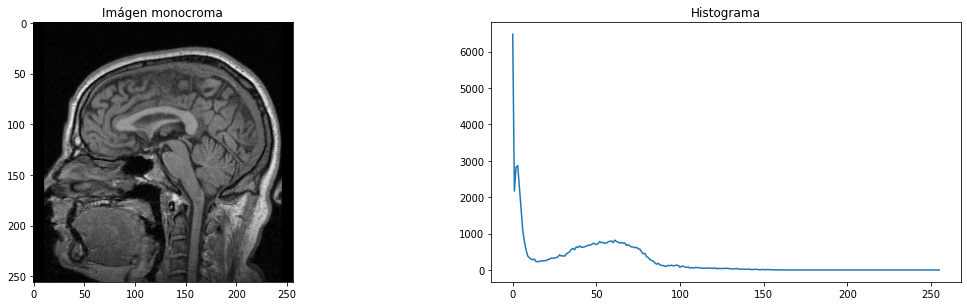

In [103]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(2,2,1),plt.imshow(f, cmap = 'gray')
plt.title('Imágen monocroma')#, plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2), plt.plot(hist)
plt.title('Histograma')#, plt.xticks([]), plt.yticks([])

In [122]:
umbral=69
ret1, binaria1=cv2.threshold(f,umbral,255,cv2.THRESH_BINARY)
histbin=cv2.calcHist([binaria1],[0],None,[256],[0,256])

Text(0.5, 1.0, 'Histograma')

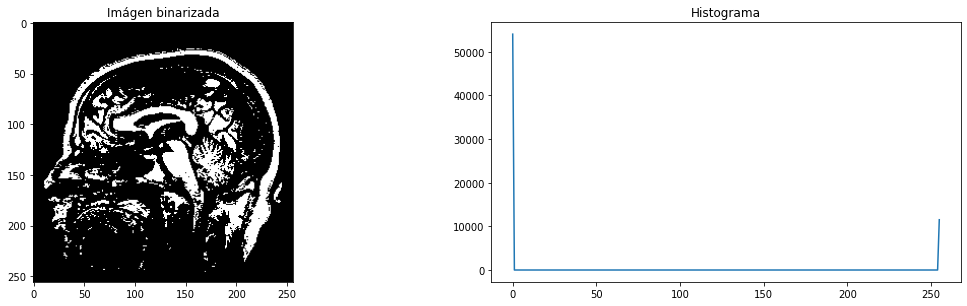

In [123]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(2,2,1),plt.imshow(binaria1, cmap = 'gray', vmin=0, vmax=255)
plt.title('Imágen binarizada')#, plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2), plt.plot(histbin)
plt.title('Histograma')#, plt.xticks([]), plt.yticks([])

In [ ]:
#hay mas colores oscuros

In [126]:
kernel = np.zeros((3,3),np.uint8)
kernel[1:2,:]=1
kernel[:,1:2]=1
print(kernel)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


[[0 1 0]
 [1 1 1]
 [0 1 0]]


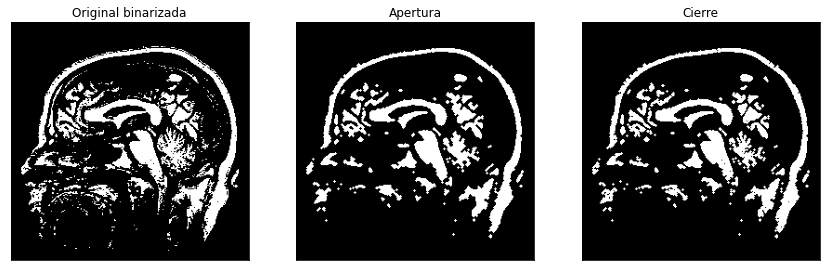

In [130]:
#Morfología
kernel = np.zeros((3,3),np.uint8)
kernel[1:2,:]=1
kernel[:,1:2]=1
print(kernel)


apertura = cv2.morphologyEx(binaria1, cv2.MORPH_OPEN, kernel)
cierre = cv2.morphologyEx(apertura, cv2.MORPH_CLOSE, kernel)
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.subplot(1,3,1), plt.imshow(binaria1,cmap='gray'),plt.title('Original binarizada'),plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(cierre,cmap='gray'),plt.title('Apertura'),plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(apertura,cmap='gray'),plt.title('Cierre'),plt.xticks([]), plt.yticks([])
plt.show()

Ingrese umbral inferior: 60
Ingrese umbral superior: 80


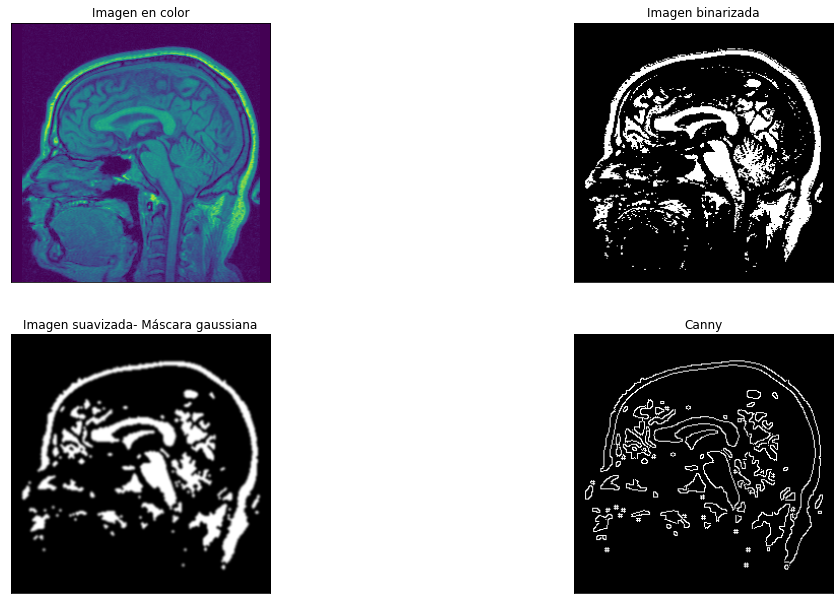

In [131]:
imggausiana=cv2.GaussianBlur(cierre,(5,5),0) #0 indica la desviación estándar de la función, y que se encarga ella misma de 
#de aplicar esa desviación

umbralin=int(input('Ingrese umbral inferior: '))
umbralsu=int(input('Ingrese umbral superior: '))

imggcanny = cv2.Canny(imggausiana, umbralin,umbralsu)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5) 

plt.subplot(2,2,1), plt.imshow(f)
plt.title('Imagen en color'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2), plt.imshow(binaria1,cmap='gray')
plt.title('Imagen binarizada'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3), plt.imshow(imggausiana,cmap='gray')
plt.title('Imagen suavizada- Máscara gaussiana'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4), plt.imshow(imggcanny,cmap='gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])


plt.show()


Encontró  87  objetos


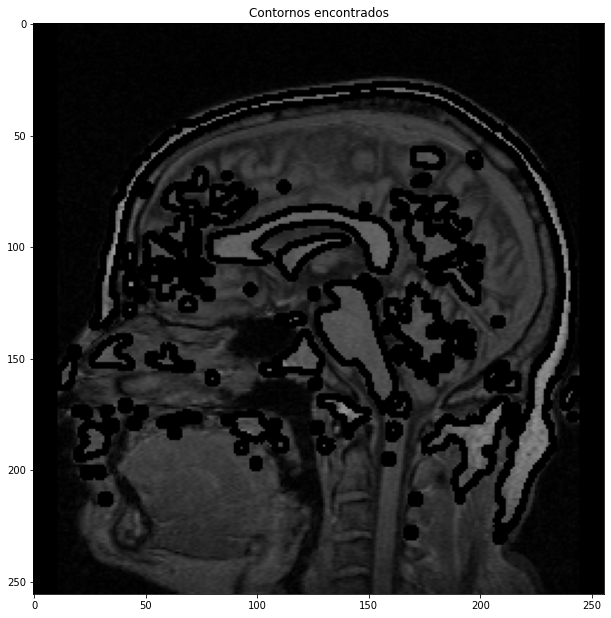

In [135]:
(contornos, hierarc) = cv2.findContours(imggcanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("Encontró ",len(contornos)," objetos")

cv2.drawContours(f,contornos,-1,(0,0,255), 2)

imgcolorRGB=cv2.cvtColor(f,cv2.COLOR_BGR2RGB)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(imgcolorRGB),plt.title('Contornos encontrados')
plt.show()